In [10]:
import numpy as np

In [2]:
import os

# Add your recording directory here
recording_location = '/Users/cmml/recordings/15'

def print_file_structure(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f'{subindent}{f}')
print_file_structure(recording_location)

15/
    .DS_Store
    000/
        .DS_Store
        annotation.pldata
        annotation_timestamps.npy
        blinks.pldata
        blinks_timestamps.npy
        eye0.intrinsics
        eye0.mp4
        eye0_lookup.npy
        eye0_timestamps.npy
        eye1.intrinsics
        eye1.mp4
        eye1_lookup.npy
        eye1_timestamps.npy
        fixations.pldata
        fixations_timestamps.npy
        gaze.pldata
        gaze_timestamps.npy
        head_pose.pldata
        head_pose_timestamps.npy
        info.player.json
        notify.pldata
        notify_timestamps.npy
        pupil.pldata
        pupil_timestamps.npy
        user_info.csv
        world.intrinsics
        world.mp4
        world_lookup.npy
        world_timestamps.npy
        exports/
            .DS_Store
            000/
                annotations.csv
                blink_detection_report.csv
                blinks.csv
                export_info.csv
                eye0.mp4
                eye0_timestamps.

In [3]:
import pandas as pd
#We use pandas to load the csv into a dataframe that we can manupilate, 
#the file location of the pupil_positions.csv can be found using the directory listing given above
#From the folder recording input just find the '/' and add each preceeding term into the next function
exported_pupil_csv = os.path.join(recording_location,  '000','exports','000', 'pupil_positions.csv')
pupil_pd_frame = pd.read_csv(exported_pupil_csv)

In [4]:
pupil_pd_frame

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
0,167.696603,0,0,1.0,0.362211,0.258386,56.154826,pye3d 0.0.7 real-time,144.884453,296.645701,...,0.353268,-0.807137,1.753301,1.209734,-2.100878,219.799631,239.183306,287.294999,287.294999,0.0
1,167.696603,0,0,1.0,0.362196,0.258391,56.149334,2d c++,144.878220,296.643478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,167.698613,0,1,1.0,0.252868,0.767497,48.509650,pye3d 0.0.7 real-time,101.147241,93.001011,...,-0.284432,-0.760460,1.377765,1.859211,-2.225508,197.920245,142.063813,306.808680,306.808680,0.0
3,167.698613,0,1,1.0,0.252858,0.767486,48.500595,2d c++,101.143379,93.005745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,167.704936,0,0,1.0,0.362515,0.257810,56.219187,pye3d 0.0.7 real-time,145.005840,296.876151,...,0.356648,-0.806455,1.755189,1.206119,-2.099976,219.799631,239.183306,287.294999,287.294999,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49383,270.650379,2655,0,1.0,0.345793,0.272771,58.333225,2d c++,138.317383,290.891670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49384,270.652154,2655,1,1.0,0.258082,0.761352,47.739521,pye3d 0.0.7 real-time,103.232868,95.459115,...,-0.245173,-0.805458,1.504422,1.818495,-2.161022,189.006423,139.630270,282.464336,282.464336,0.0
49385,270.652154,2655,1,1.0,0.258097,0.761380,47.759781,2d c++,103.238609,95.447899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49386,270.658712,2655,0,1.0,0.346145,0.272165,58.250845,pye3d 0.0.7 real-time,138.458128,291.133884,...,0.296713,-0.826433,1.931583,1.269548,-2.095635,218.069732,242.282570,275.313213,275.313213,0.0


In [14]:
detector_2d_data = pupil_pd_frame[pupil_pd_frame.method == '2d c++']
detector_2d_data

,pupil_timestamp,world_index,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method,ellipse_center_x,ellipse_center_y,...,circle_3d_normal_y,circle_3d_normal_z,circle_3d_radius,theta,phi,projected_sphere_center_x,projected_sphere_center_y,projected_sphere_axis_a,projected_sphere_axis_b,projected_sphere_angle
1,167.696603,0,0,1.0,0.362196,0.258391,56.149334,2d c++,144.878220,296.643478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,167.698613,0,1,1.0,0.252858,0.767486,48.500595,2d c++,101.143379,93.005745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,167.704936,0,0,1.0,0.362511,0.257802,56.219948,2d c++,145.004234,296.879059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,167.706946,0,1,1.0,0.253061,0.768017,49.164886,2d c++,101.224403,92.793335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,167.713269,1,0,1.0,0.361935,0.257959,56.630180,2d c++,144.774033,296.816284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49379,270.642046,2654,0,1.0,0.346203,0.272592,58.195538,2d c++,138.481010,290.963318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49381,270.643821,2655,1,1.0,0.258691,0.761194,47.536942,2d c++,103.476395,95.522499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49383,270.650379,2655,0,1.0,0.345793,0.272771,58.333225,2d c++,138.317383,290.891670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49385,270.652154,2655,1,1.0,0.258097,0.761380,47.759781,2d c++,103.238609,95.447899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
x = np.asarray(detector_2d_data['pupil_timestamp'])

In [12]:
np.where(x>=167.866091963999)[0]

array([   42,    43,    44, ..., 24691, 24692, 24693])

In [18]:
from IPython.display import display

#We just need 2d data
detector_2d_data = pupil_pd_frame[pupil_pd_frame.method == '2d c++']

#split in left/right eye
eye0_df = detector_2d_data[(detector_2d_data.eye_id == 0)]# & (detector_2d_data.confidence==1.000)]
eye1_df = detector_2d_data[detector_2d_data.eye_id == 1] #& (detector_2d_data.confidence==1.000)]
pd.options.display.float_format = '{:.3f}'.format

print("eye0 (right eye) data:")
display(eye0_df[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','method']])

print("eye1 data (left eye) data:")
display(eye1_df[['pupil_timestamp', 'eye_id', 'confidence', 'norm_pos_x', 'norm_pos_y', 'diameter','method']])

eye0 (right eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method
1,167.697,0,1.000,0.362,0.258,56.149,2d c++
5,167.705,0,1.000,0.363,0.258,56.220,2d c++
8,167.713,0,1.000,0.362,0.258,56.630,2d c++
13,167.722,0,1.000,0.362,0.258,56.419,2d c++
17,167.730,0,1.000,0.363,0.258,56.631,2d c++
...,...,...,...,...,...,...,...
49370,270.625,0,1.000,0.346,0.273,58.524,2d c++
49374,270.634,0,1.000,0.346,0.273,58.523,2d c++
49379,270.642,0,1.000,0.346,0.273,58.196,2d c++
49383,270.650,0,1.000,0.346,0.273,58.333,2d c++


eye1 data (left eye) data:


,pupil_timestamp,eye_id,confidence,norm_pos_x,norm_pos_y,diameter,method
3,167.699,1,1.000,0.253,0.767,48.501,2d c++
7,167.707,1,1.000,0.253,0.768,49.165,2d c++
11,167.715,1,1.000,0.252,0.768,49.170,2d c++
14,167.724,1,1.000,0.253,0.768,49.181,2d c++
18,167.732,1,1.000,0.253,0.768,48.510,2d c++
...,...,...,...,...,...,...,...
49369,270.619,1,1.000,0.259,0.761,47.581,2d c++
49372,270.627,1,1.000,0.258,0.761,47.421,2d c++
49376,270.635,1,1.000,0.258,0.761,47.622,2d c++
49381,270.644,1,1.000,0.259,0.761,47.537,2d c++


In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Pupil Diameter')

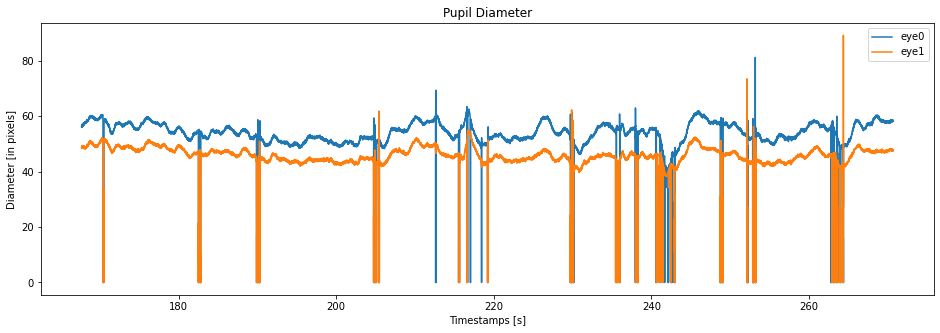

In [20]:
plt.figure(figsize=(16, 5))
plt.plot(eye0_df['pupil_timestamp'], eye0_df['diameter'])
plt.plot(eye1_df['pupil_timestamp'], eye1_df['diameter'])
plt.legend(['eye0', 'eye1'])
plt.xlabel('Timestamps [s]')
plt.ylabel('Diameter [in pixels]')
plt.title('Pupil Diameter')

In [25]:
np.where(np.asarray(eye0_df['pupil_timestamp'])>168.120094275)

(array([   51,    52,    53, ..., 12339, 12340, 12341]),)